## Problem Statement :


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.



### Business Goal 



You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Step 1: Reading and Understanding the Data


In [2]:
# importing all the important
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os



In [3]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading the dataset
housingData = pd.read_csv("train.csv", encoding = 'utf-8')
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Check the dimensions
housingData.shape


(1460, 81)

In [7]:
# Check for column details
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#summary of all the numeric columns
housingData.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [11]:
# Checking for percentage nulls
round(100*(housingData.isnull().sum()/len(housingData.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Cleaning Data


### Drop columns that are not useful for analysis


In [16]:
#Checking the unique values in the data
housingData.nunique().sort_values()

Street              2
Alley               2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
BsmtHalfBath        3
LandSlope           3
PoolQC              3
GarageFinish        3
ExterQual           4
KitchenQual         4
MasVnrType          4
BsmtExposure        4
Fence               4
MiscFeature         4
BsmtQual            4
Fireplaces          4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
KitchenAbvGr        4
BsmtCond            4
GarageCars          5
FireplaceQu         5
GarageQual          5
GarageCond          5
Electrical          5
HeatingQC           5
ExterCond           5
MSZoning            5
YrSold              5
LotConfig           5
BldgType            5
RoofStyle           6
Heating             6
SaleCondition       6
Foundation          6
GarageType          6
BsmtFinType2        6
BsmtFinType1        6
Functional          7
PoolArea            8
BedroomAbvGr        8
HouseStyle

In [15]:
# Droping Id column as it is index column which has nothing to do with target
housingData.drop(['Id'], axis = 1, inplace = True)


#### According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price

#### Hence, we will first impute the categorical variables with 'None'


In [18]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    housingData[i].fillna("none", inplace=True)


In [20]:
# Check nulls once again

housingData.columns[housingData.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [21]:
#Identify percentage of null value 
null_2 = housingData.isnull().sum()/len(housingData)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

#### Remove categorical attributes that have more than 85% data associated to one value.


- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value


In [22]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housingData.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingData[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housingData.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,none,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,none,0,2,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,none,0,5,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,none,0,9,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,none,0,2,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,none,0,12,2008,Normal,250000


In [23]:
housingData.shape

(1460, 59)

In [24]:
# once again check for null values in all categorical columns

housingData.select_dtypes(include='object').isnull().sum()[housingData.select_dtypes(include='object').isnull().sum()>0]


Series([], dtype: int64)

No more null values in the categorical variables



#### Removing null values in Numerical attributes


In [25]:
# check the null values in the numerical data

housingData.select_dtypes(include=['int64','float']).isnull().sum()[housingData.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [26]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

housingData['LotFrontage'] = housingData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [28]:
housingData['MasVnrArea'] = housingData['MasVnrArea'].replace(np.nan, housingData['MasVnrArea'].median())


In [29]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housingData['GarageYrBlt'] = housingData['GarageYrBlt'].fillna(0)
housingData['GarageYrBlt'] = housingData['GarageYrBlt'].astype(int)

## EDA on the cleaned data


In [32]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

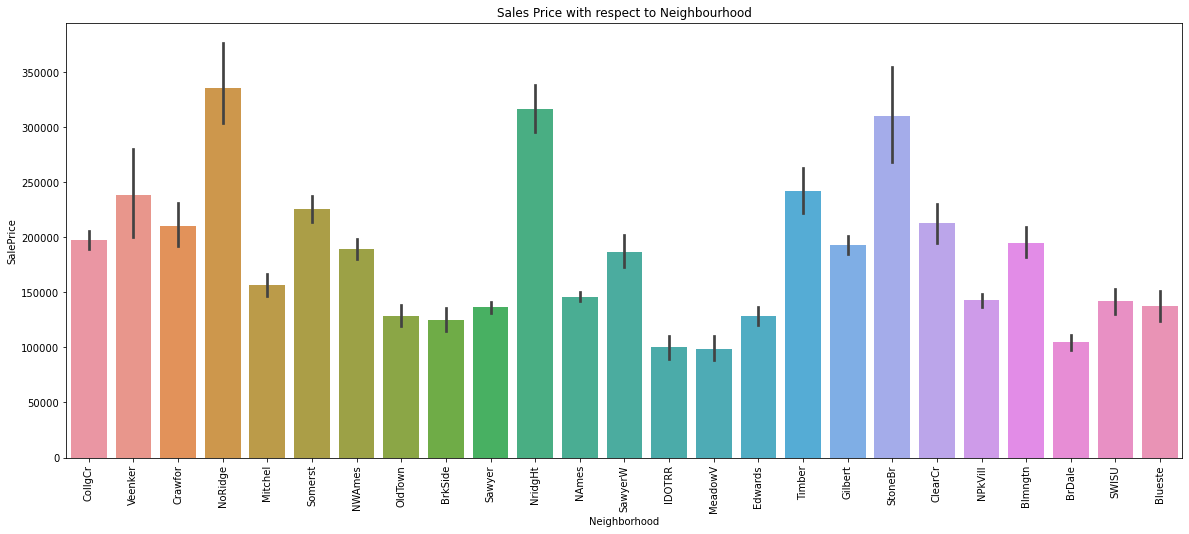

In [33]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housingData)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### Properties in some of the Neighborhoods are high priced.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

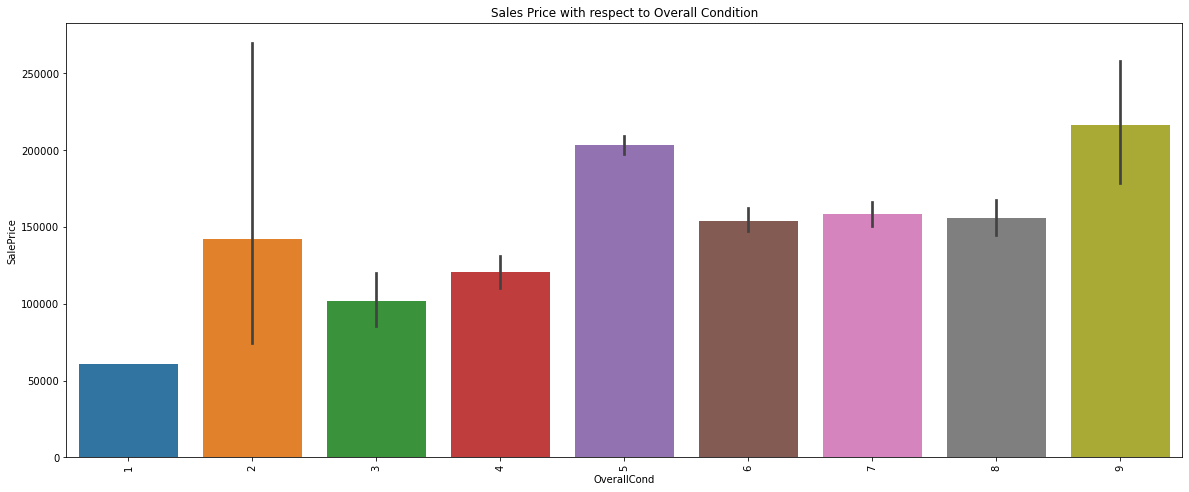

In [34]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housingData)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

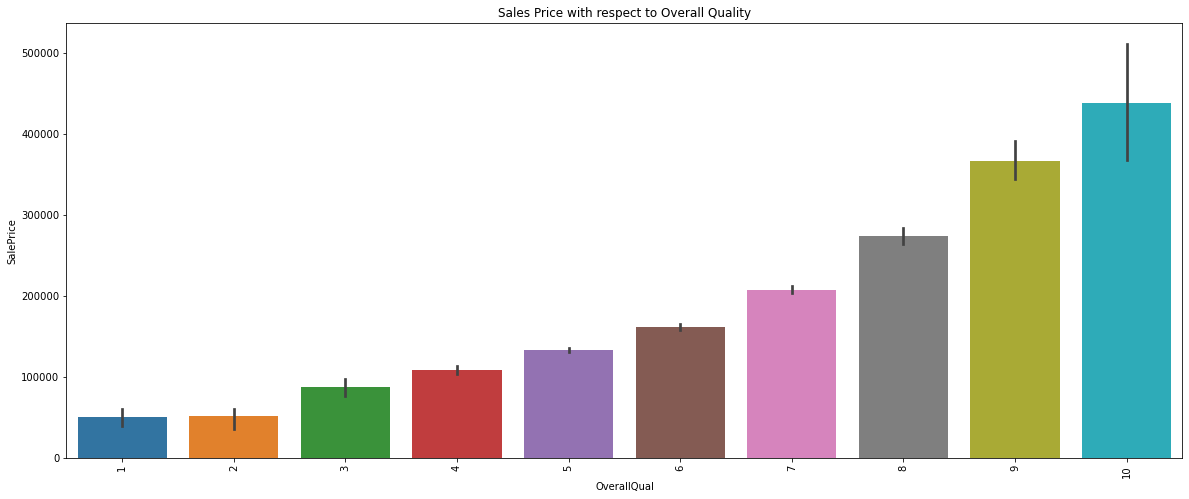

In [35]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housingData)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### Increase in the overall quality has a direct positive effect on the sale price


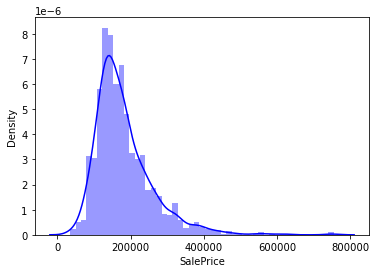

In [37]:
# Sale columns
plt.figure()
sns.distplot(housingData['SalePrice'],color='b')
plt.show()

In [38]:
data_raw = housingData.copy


#### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data


In [39]:
#Log Transformation
housingData['SalePrice']=np.log1p(housingData['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

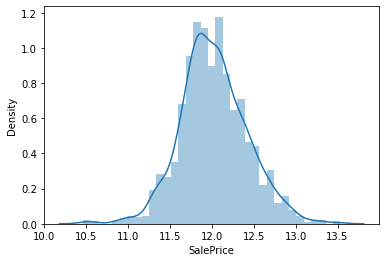

In [41]:
sns.distplot(housingData['SalePrice'])


In [42]:
# correlation matrix
cor = data_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

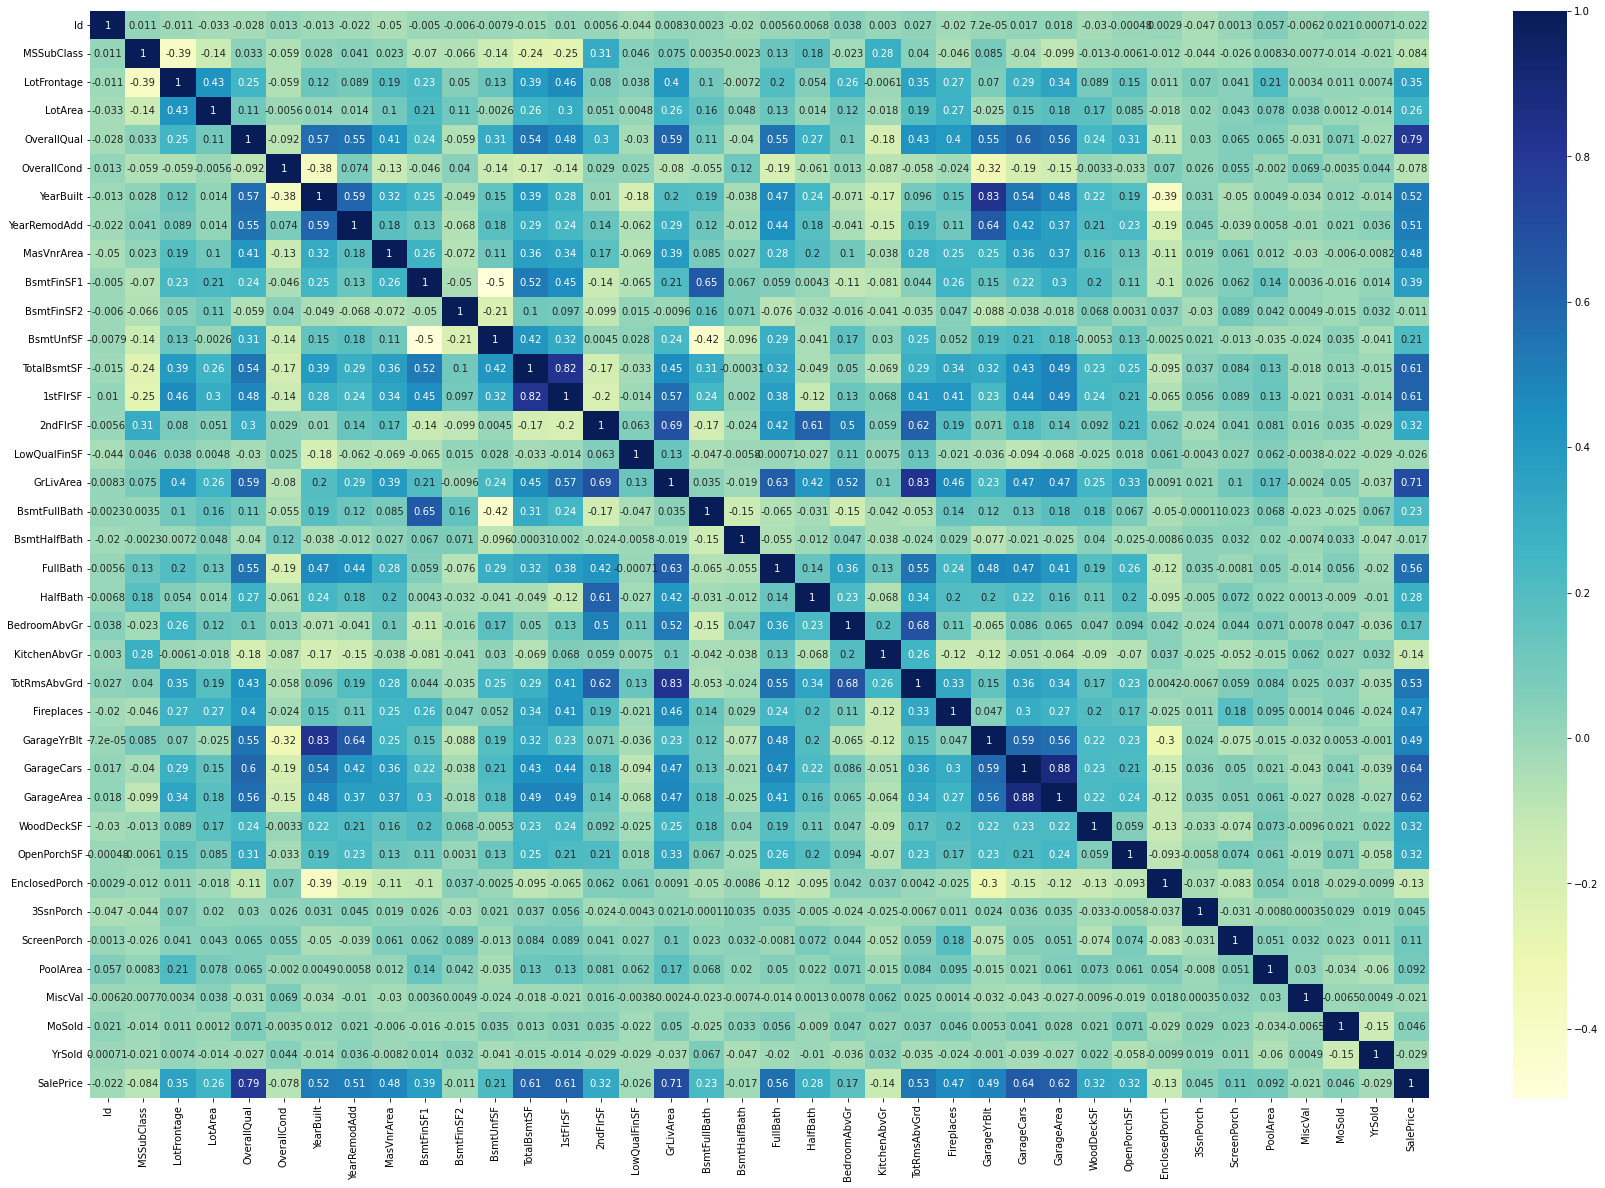

In [43]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

We can see that some of the variables are correlated

Before dropping these columns, we will first check their predictive power

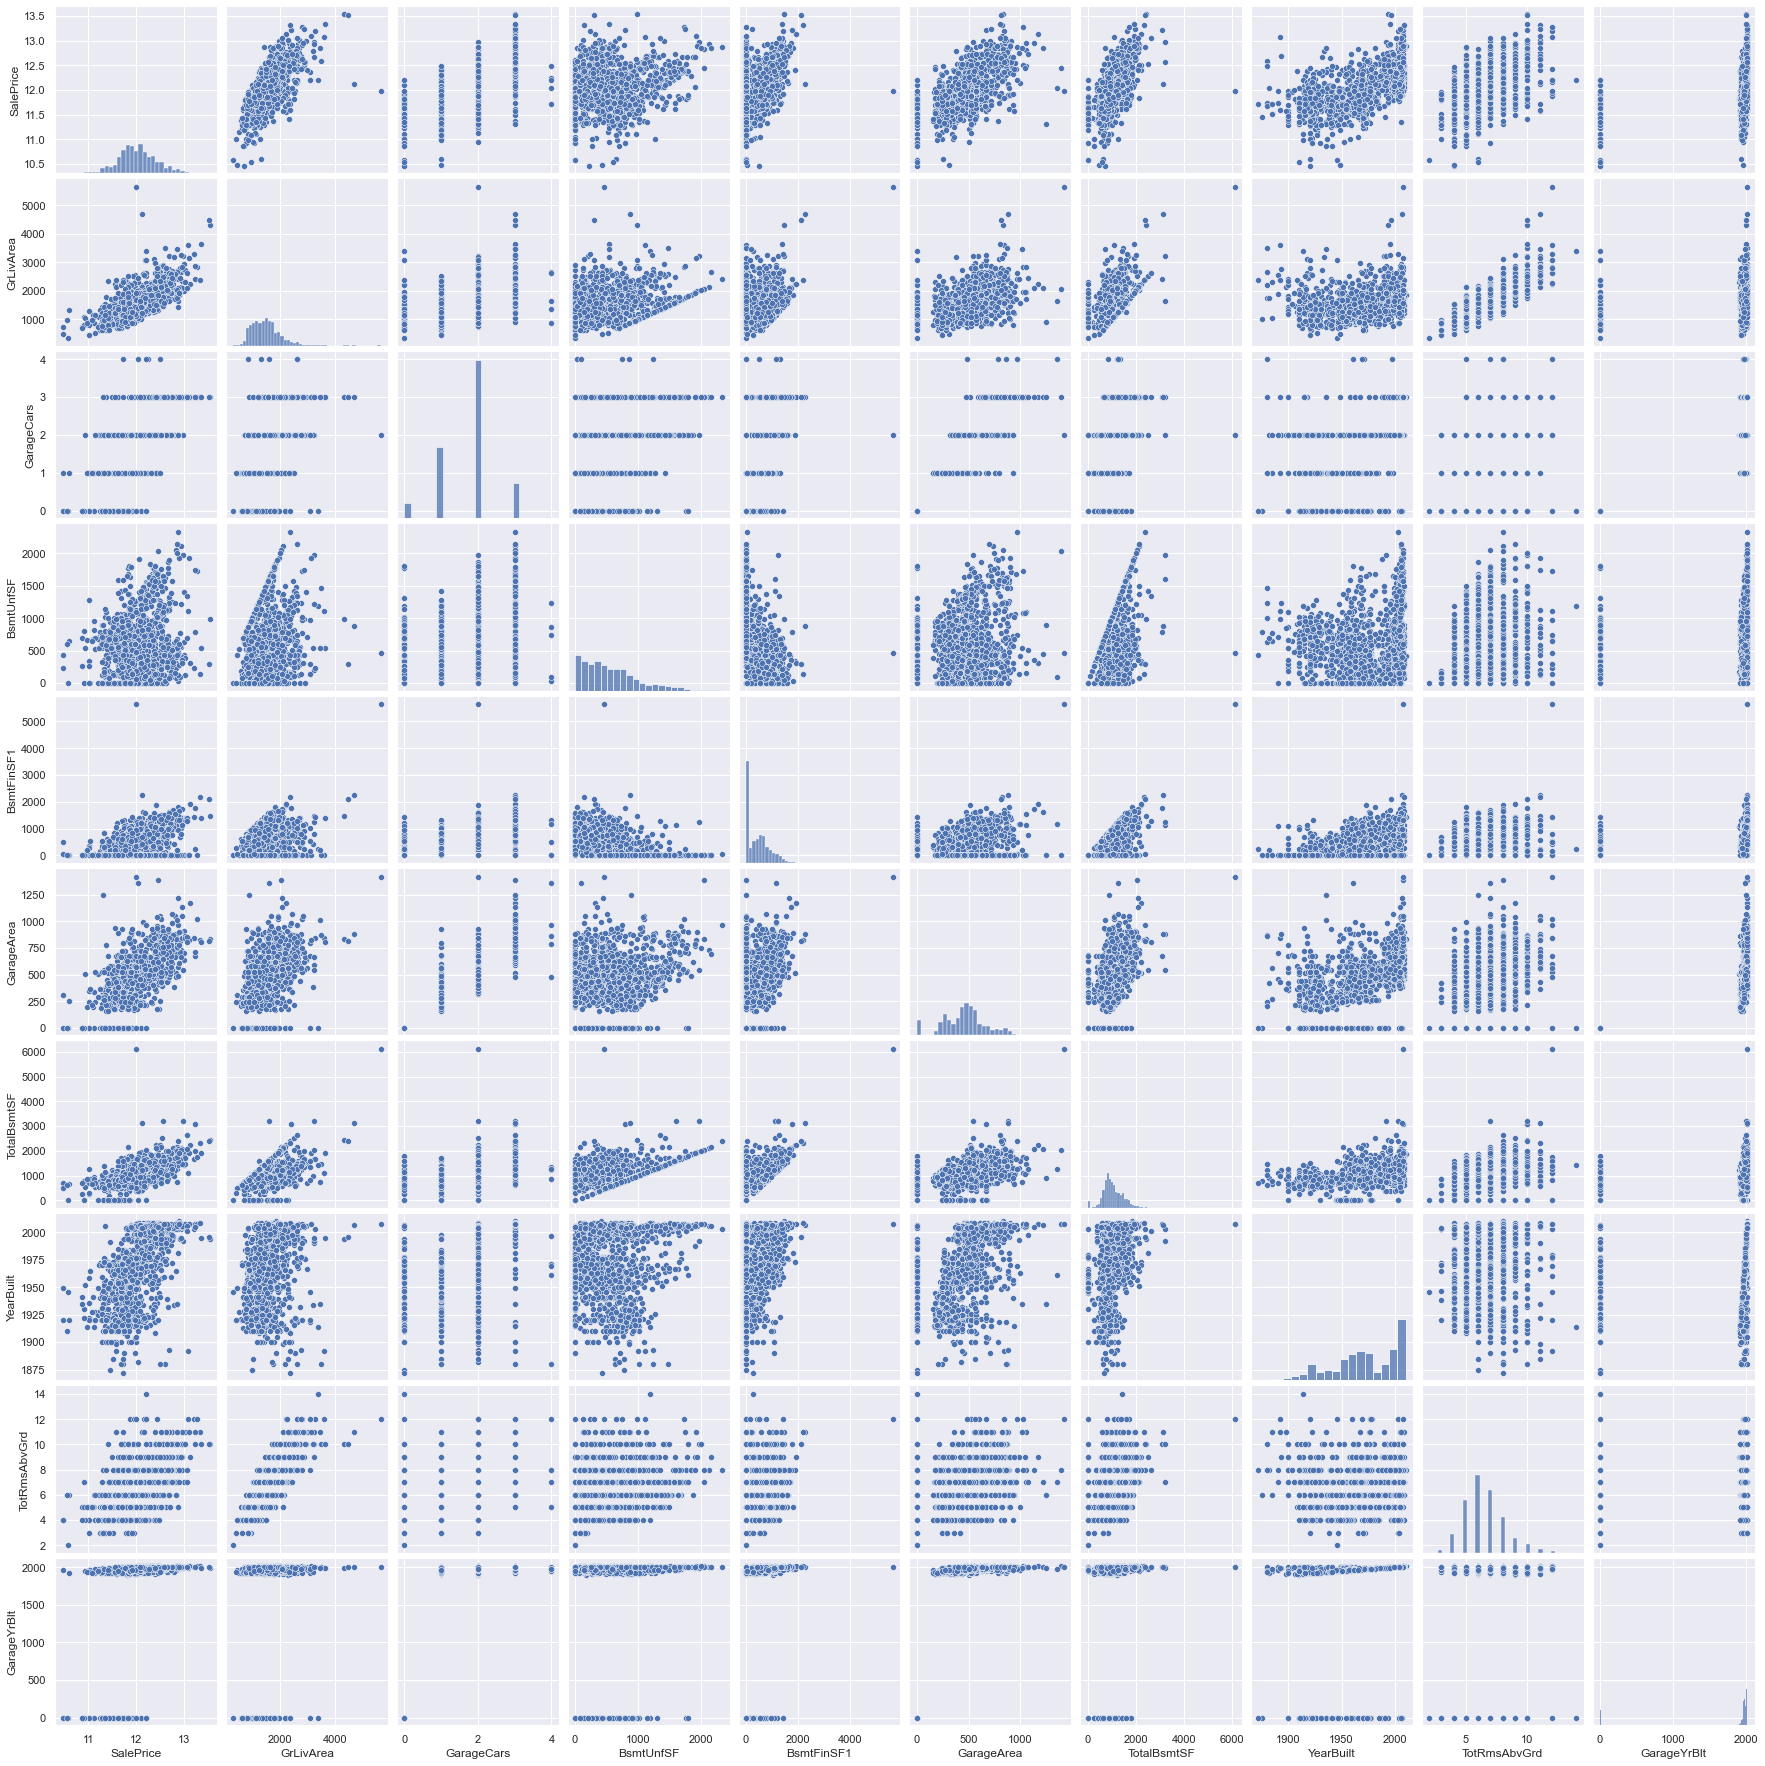

In [44]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housingData[cols], size = 2.5)
plt.show()

#### Drop columns that are correlated and not contributing to 'SalePrice'


In [46]:
housingData = housingData.drop(['GarageCars'], axis = 1)
housingData = housingData.drop(['BsmtUnfSF'], axis = 1)
housingData = housingData.drop(['TotRmsAbvGrd'], axis = 1)
housingData = housingData.drop(['GarageYrBlt'], axis = 1)    

housingData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,0,61,0,0,0,0,none,0,2,2008,Normal,12.247699
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,298,0,0,0,0,0,none,0,5,2007,Normal,12.109016
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,0,42,0,0,0,0,none,0,9,2008,Normal,12.317171
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,0,35,272,0,0,0,none,0,2,2006,Abnorml,11.849405
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,192,84,0,0,0,0,none,0,12,2008,Normal,12.429220


In [47]:
#Numeric columns
housingData.select_dtypes(exclude=['object'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,11.864469


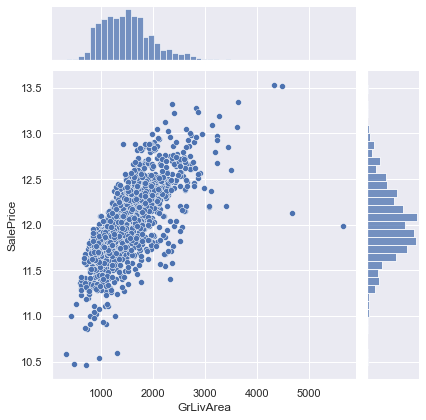

In [48]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housingData)
plt.show()

#### Since the dataset is small it is not advisable to do remove outliers.


#### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'


In [50]:
# PropAge -  Property Age from yearsold - yearbuilt
housingData['PropAge'] = (housingData['YrSold'] - housingData['YearBuilt'])
housingData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,0,61,0,0,0,0,none,0,2,2008,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,298,0,0,0,0,0,none,0,5,2007,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,0,42,0,0,0,0,none,0,9,2008,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,0,35,272,0,0,0,none,0,2,2006,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,192,84,0,0,0,0,none,0,12,2008,Normal,12.429220,8


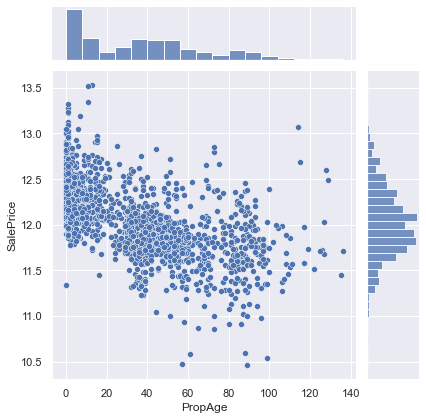

In [51]:
# PropAge vs SalePrice
sns.jointplot(x = housingData['PropAge'], y = housingData['SalePrice'])
plt.show()

Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value


#### Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further


In [52]:
housingData = housingData.drop(['MoSold'], axis = 1)
housingData = housingData.drop(['YrSold'], axis = 1)
housingData = housingData.drop(['YearBuilt'], axis = 1)
housingData = housingData.drop(['YearRemodAdd'], axis = 1)
housingData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,0,61,0,0,0,0,none,0,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,298,0,0,0,0,0,none,0,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,0,42,0,0,0,0,none,0,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,0,35,272,0,0,0,none,0,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,192,84,0,0,0,0,none,0,Normal,12.429220,8


## Step 3. Data Preparation



In [63]:
housingData.shape

(1460, 52)

#### Let's now prepare the data and build the model.



In [64]:
#type of each feature in data: int, float, object
types = housingData.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]


In [65]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()


int64      27
object     22
float64     3
Name: 0, dtype: int64

In [66]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropAge']


In [67]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)


['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']


### Creating Dummy columns to convert categorical into numerical


In [68]:
housingData = pd.get_dummies(housingData, drop_first=True )
housingData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [69]:
X = housingData.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [76]:
numerical_columns.remove('SalePrice')

In [70]:
# Putting response variable to y
y = housingData['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [71]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)


In [73]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [74]:
scaler=MinMaxScaler()


In [77]:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [78]:
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,0.000000,0.215753,0.052887,0.555556,0.750,0.0,0.084515,0.0,0.196727,0.418541,0.000000,0.0,0.343632,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.333333,0.406206,0.000000,0.057769,0.070652,0.0,0.000000,0.0,0.0,0.422222,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1408,0.294118,0.133562,0.030101,0.333333,0.750,0.0,0.000000,0.0,0.101800,0.093391,0.301211,0.0,0.193858,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.372355,0.000000,0.000000,0.000000,0.0,0.436364,0.0,0.0,0.740741,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1148,0.176471,0.133562,0.020566,0.666667,0.750,0.0,0.000000,0.0,0.093617,0.054612,0.261017,0.0,0.146383,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.203103,0.000000,0.000000,0.318841,0.0,0.000000,0.0,0.0,0.607407,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
861,1.000000,0.184932,0.048260,0.444444,0.375,0.0,0.149008,0.0,0.170049,0.161771,0.000000,0.0,0.132818,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.000000,0.355430,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.333333,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
220,0.000000,0.178082,0.035944,0.666667,0.500,0.0,0.000000,0.0,0.245172,0.267095,0.000000,0.0,0.219292,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.000000,0.476023,0.523881,0.065737,0.000000,0.0,0.000000,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [79]:
X_test.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,0.000000,0.178082,0.035640,0.777778,0.500,0.000000,0.002835,0.0,0.239935,0.259752,0.000000,0.0,0.213263,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.000000,0.430183,0.149254,0.035857,0.0,0.0,0.0,0.0,0.0,0.014815,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
530,0.352941,0.219178,0.041599,0.555556,0.500,0.158926,0.138731,0.0,0.239116,0.269619,0.000000,0.0,0.221364,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.423131,0.334328,0.000000,0.0,0.0,0.0,0.0,0.0,0.148148,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1291,0.823529,0.000000,0.001776,0.444444,0.750,0.194485,0.040928,0.0,0.103110,0.067921,0.325424,0.0,0.182366,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.186178,0.276119,0.000000,0.0,0.0,0.0,0.0,0.0,0.274074,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1385,0.176471,0.065068,0.019332,0.333333,0.875,0.000000,0.130227,0.0,0.130278,0.106012,0.173366,0.0,0.154484,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.169252,0.000000,0.191235,0.0,0.0,0.0,0.0,0.0,0.651852,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
305,0.000000,0.202055,0.042469,0.777778,0.500,0.178520,0.259391,0.0,0.327332,0.382285,0.000000,0.0,0.313866,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.000000,0.626234,0.250746,0.000000,0.0,0.0,0.0,0.0,0.0,0.022222,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Step 4. Model Building and Evaluation


### Lets first check the model using Linear Regression and RFE (OPTIONAL)


In [80]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [81]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)


In [82]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 35),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 48),
 ('TotalBsmtSF', False, 2),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 56),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 38),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 62),
 ('LotConfig_CulDSac', True, 1),
 ('LotConf

In [83]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseSty

In [84]:
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtHalfBath',
       'LotShape_IR2', 'LotShape_Reg', 'LotConfig_Inside',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Shed', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'ExterQual_Fa', 'Foundation_CBlock', 'Fo

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [86]:
X_train_rfe = pd.DataFrame(X_train[col])


In [87]:
X_train_rfe.head()


,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_2.5Fin,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_ImStucc,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Stucco,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Gd,ExterQual_TA,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_Unf,BsmtFinType1_none,HeatingQC_Fa,HeatingQC_Po,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_none,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Fence_GdWo,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,0.215753,0.052887,0.555556,0.750,0.084515,0.418541,0.000000,0.0,0.343632,0.333333,0.666667,0.0,0.500,0.333333,0.333333,0.406206,0.000000,0.057769,0.070652,0.0,0.000000,0.0,0.0,0.422222,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1408,0.133562,0.030101,0.333333,0.750,0.000000,0.093391,0.301211,0.0,0.193858,0.000000,0.333333,0.0,0.375,0.333333,0.000000,0.372355,0.000000,0.000000,0.000000,0.0,0.436364,0.0,0.0,0.740741,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1148,0.133562,0.020566,0.666667,0.750,0.000000,0.054612,0.261017,0.0,0.146383,0.000000,0.333333,0.0,0.250,0.333333,0.333333,0.203103,0.000000,0.000000,0.318841,0.0,0.000000,0.0,0.0,0.607407,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
861,0.184932,0.048260,0.444444,0.375,0.149008,0.161771,0.000000,0.0,0.132818,0.333333,0.333333,0.5,0.375,0.333333,0.000000,0.355430,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0
220,0.178082,0.035944,0.666667,0.500,0.000000,0.267095,0.000000,0.0,0.219292,0.000000,0.666667,0.0,0.250,0.333333,0.000000,0.476023,0.523881,0.065737,0.000000,0.0,0.000000,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1


In [88]:
X_train_rfe.shape


(1021, 100)

In [89]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9211599917786294

In [90]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)


0.8525286836552411

### Lasso and Ridge Regression


In [91]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)


X_train (1021, 165)
y_train (1021,)


In [92]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054706,0.011936,0.003067,0.000562,0.0001,{'alpha': 0.0001},-0.096401,-0.081520,-0.102175,-0.102297,-0.092476,-0.094974,0.007678,2,-0.075295,-0.080731,-0.075526,-0.067643,-0.076730,-0.075185,0.004246
1,0.009263,0.000659,0.002579,0.000044,0.001,{'alpha': 0.001},-0.093247,-0.087326,-0.093214,-0.105028,-0.089022,-0.093568,0.006184,1,-0.087266,-0.088854,-0.086570,-0.080529,-0.085919,-0.085828,0.002824
2,0.006146,0.000261,0.002595,0.000158,0.01,{'alpha': 0.01},-0.146344,-0.132265,-0.142221,-0.163868,-0.141173,-0.145174,0.010414,3,-0.140394,-0.142736,-0.139923,-0.138174,-0.140613,-0.140368,0.001462
3,0.005331,0.000046,0.002519,0.000052,0.05,{'alpha': 0.05},-0.214602,-0.195295,-0.221219,-0.246960,-0.216047,-0.218825,0.016592,4,-0.218535,-0.219360,-0.215267,-0.215342,-0.217485,-0.217198,0.001656
4,0.005041,0.000140,0.002510,0.000016,0.1,{'alpha': 0.1},-0.292576,-0.262833,-0.292734,-0.330792,-0.283960,-0.292579,0.021997,5,-0.294547,-0.289280,-0.290127,-0.290384,-0.292463,-0.291360,0.001906


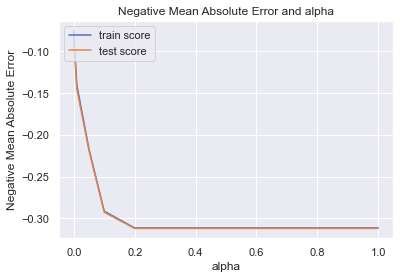

In [94]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,

but we will choose a low value of alpha to balance the trade-off between Bias-Variance

and to get the coefficients of smallest of features.



In [95]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.61986136,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.11715116,  0.        ,  0.        , -0.        ,  0.        ,
        0.25022217,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.05460687, -0.03898315,  0.        ,  0.        ,
       -0.04465991,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero


In [96]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.645),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.62),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.117),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.25),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('PropAge', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.055),
 ('MSZoning_RM', -0.039),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.045),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_B

In [97]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7541355304801737
0.7419779178798043


In [98]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 0.20184462436090922


#### The R2 values for Train and Test matches well, indicating an optimum model


In [99]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))


In [100]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()


,Variable,Coeff
0,constant,11.645
1,MSSubClass,-0.000
2,LotFrontage,0.000
3,LotArea,0.000
4,OverallQual,0.620


In [101]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.645
4,OverallQual,0.620
21,GarageArea,0.250
16,FullBath,0.117
118,Foundation_PConc,0.062
...,...,...
33,MSZoning_RM,-0.039
36,LotShape_Reg,-0.045
116,ExterQual_TA,-0.064
142,KitchenQual_TA,-0.077


In [102]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred


,Variable,Coeff
0,constant,11.645
4,OverallQual,0.620
21,GarageArea,0.250
16,FullBath,0.117
118,Foundation_PConc,0.062
32,MSZoning_RL,0.055
131,BsmtFinType1_GLQ,0.054
148,GarageType_Attchd,0.031
73,HouseStyle_2Story,0.026
126,BsmtExposure_Gd,0.021


In [103]:
pred.shape


(21, 2)

#### These 20 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice


In [104]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GarageArea', 'FullBath', 'Foundation_PConc', 'MSZoning_RL', 'BsmtFinType1_GLQ', 'GarageType_Attchd', 'HouseStyle_2Story', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtQual_TA', 'BsmtFinType1_Unf', 'GarageFinish_Unf', 'MasVnrType_None', 'RoofStyle_Gable', 'MSZoning_RM', 'LotShape_Reg', 'ExterQual_TA', 'KitchenQual_TA', 'FireplaceQu_none']


In [105]:
X_train_lasso = X_train[['OverallQual', 'GarageArea', 'FullBath', 'Foundation_PConc', 'MSZoning_RL', 'BsmtFinType1_GLQ', 'GarageType_Attchd', 'HouseStyle_2Story', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtQual_TA', 'BsmtFinType1_Unf', 'GarageFinish_Unf', 'MasVnrType_None', 'RoofStyle_Gable', 'MSZoning_RM', 'LotShape_Reg', 'ExterQual_TA', 'KitchenQual_TA', 'FireplaceQu_none']]
                        
X_train_lasso.head()


,OverallQual,GarageArea,FullBath,Foundation_PConc,MSZoning_RL,BsmtFinType1_GLQ,GarageType_Attchd,HouseStyle_2Story,BsmtExposure_Gd,BsmtExposure_No,BsmtQual_TA,BsmtFinType1_Unf,GarageFinish_Unf,MasVnrType_None,RoofStyle_Gable,MSZoning_RM,LotShape_Reg,ExterQual_TA,KitchenQual_TA,FireplaceQu_none
175,0.555556,0.406206,0.666667,0,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,0
1408,0.333333,0.372355,0.333333,0,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1
1148,0.666667,0.203103,0.333333,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0
861,0.444444,0.355430,0.333333,1,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1
220,0.666667,0.476023,0.666667,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1


In [106]:
X_train_lasso.shape


(1021, 20)

In [107]:
X_test_lasso = X_test[['OverallQual', 'GarageArea', 'FullBath', 'Foundation_PConc', 'MSZoning_RL', 'BsmtFinType1_GLQ', 'GarageType_Attchd', 'HouseStyle_2Story', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtQual_TA', 'BsmtFinType1_Unf', 'GarageFinish_Unf', 'MasVnrType_None', 'RoofStyle_Gable', 'MSZoning_RM', 'LotShape_Reg', 'ExterQual_TA', 'KitchenQual_TA', 'FireplaceQu_none']]
                        
X_test_lasso.head()


,OverallQual,GarageArea,FullBath,Foundation_PConc,MSZoning_RL,BsmtFinType1_GLQ,GarageType_Attchd,HouseStyle_2Story,BsmtExposure_Gd,BsmtExposure_No,BsmtQual_TA,BsmtFinType1_Unf,GarageFinish_Unf,MasVnrType_None,RoofStyle_Gable,MSZoning_RM,LotShape_Reg,ExterQual_TA,KitchenQual_TA,FireplaceQu_none
930,0.777778,0.430183,0.666667,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1
530,0.555556,0.423131,0.666667,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1291,0.444444,0.186178,0.666667,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1
1385,0.333333,0.169252,0.333333,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,1
305,0.777778,0.626234,0.666667,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1


## Ridge Regression


In [108]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011778,0.012655,0.003222,0.000882,0.0001,{'alpha': 0.0001},-0.104351,-0.085137,-0.109389,-0.105164,-0.098778,-0.100564,0.008421,23,-0.074531,-0.079581,-0.074859,-0.065989,-0.076113,-0.074215,0.004485
1,0.005134,0.000057,0.002564,0.000055,0.001,{'alpha': 0.001},-0.104326,-0.085123,-0.109360,-0.105152,-0.098711,-0.100534,0.008420,22,-0.074530,-0.079583,-0.074856,-0.065991,-0.076112,-0.074214,0.004485
2,0.005402,0.000547,0.002727,0.000326,0.01,{'alpha': 0.01},-0.104087,-0.084990,-0.109081,-0.105036,-0.098123,-0.100264,0.008403,21,-0.074522,-0.079605,-0.074837,-0.066012,-0.076102,-0.074216,0.004481
3,0.005678,0.000815,0.002863,0.000355,0.05,{'alpha': 0.05},-0.103161,-0.084489,-0.108010,-0.104611,-0.096773,-0.099408,0.008303,20,-0.074552,-0.079695,-0.074837,-0.066120,-0.076198,-0.074280,0.004471
4,0.005194,0.000217,0.002861,0.000506,0.1,{'alpha': 0.1},-0.102182,-0.084031,-0.106926,-0.104195,-0.096061,-0.098679,0.008150,18,-0.074641,-0.079807,-0.074908,-0.066274,-0.076316,-0.074389,0.004455


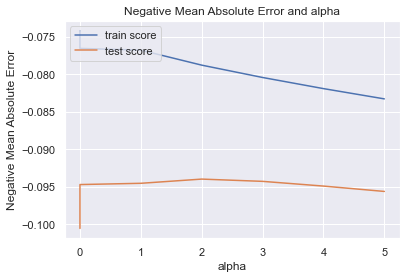

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis


In [112]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-0.0493865 , -0.02441817,  0.16351985,  0.44099457,  0.30076249,
        0.01575893, -0.03014654,  0.03185256,  0.10100707,  0.33003758,
        0.23243259,  0.01383009,  0.36276928,  0.12044579,  0.00702751,
        0.21771017,  0.08450373,  0.14018932, -0.07607645, -0.00674227,
        0.20519173,  0.05601238,  0.03618103,  0.07446939,  0.05728382,
        0.07757833, -0.12727505, -0.0361374 , -0.15046348,  0.14283829,
        0.14924681,  0.13549478,  0.10135503,  0.03153174, -0.07420729,
       -0.00366199,  0.04021084, -0.05386299, -0.0442689 , -0.01359116,
       -0.04538738, -0.05191323,  0.02209292,  0.03922887, -0.01782936,
        0.12450838, -0.09951525, -0.0338204 , -0.12023894, -0.15520656,
       -0.0369857 , -0.02210173,  0.00571235, -0.04336868,  0.10134736,
        0.08644599, -0.05370626,  0.01646222, -0.04181477, -0.01522161,
        0.0357797 ,  0.11376454,  0.01791472,  0.021592  ,  0.01942991,
        0.03531026, -0.09261403, -0.05261347, -0.02720617,  0.02

In [113]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.097),
 ('MSSubClass', -0.049),
 ('LotFrontage', -0.024),
 ('LotArea', 0.164),
 ('OverallQual', 0.441),
 ('OverallCond', 0.301),
 ('MasVnrArea', 0.016),
 ('BsmtFinSF1', -0.03),
 ('BsmtFinSF2', 0.032),
 ('TotalBsmtSF', 0.101),
 ('1stFlrSF', 0.33),
 ('2ndFlrSF', 0.232),
 ('LowQualFinSF', 0.014),
 ('GrLivArea', 0.363),
 ('BsmtFullBath', 0.12),
 ('BsmtHalfBath', 0.007),
 ('FullBath', 0.218),
 ('HalfBath', 0.085),
 ('BedroomAbvGr', 0.14),
 ('KitchenAbvGr', -0.076),
 ('Fireplaces', -0.007),
 ('GarageArea', 0.205),
 ('WoodDeckSF', 0.056),
 ('OpenPorchSF', 0.036),
 ('EnclosedPorch', 0.074),
 ('3SsnPorch', 0.057),
 ('ScreenPorch', 0.078),
 ('PoolArea', -0.127),
 ('MiscVal', -0.036),
 ('PropAge', -0.15),
 ('MSZoning_FV', 0.143),
 ('MSZoning_RH', 0.149),
 ('MSZoning_RL', 0.135),
 ('MSZoning_RM', 0.101),
 ('LotShape_IR2', 0.032),
 ('LotShape_IR3', -0.074),
 ('LotShape_Reg', -0.004),
 ('LotConfig_CulDSac', 0.04),
 ('LotConfig_FR2', -0.054),
 ('LotConfig_FR3', -0.044),
 ('LotConfig_I

In [114]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9137535984155559
0.8739612678404922


In [115]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 0.14107198028033097


It is visible that the model performance is better than Lasso. The train and the test scores are matching well


In [116]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))


In [117]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.097
4,OverallQual,0.441
13,GrLivArea,0.363
10,1stFlrSF,0.330
5,OverallCond,0.301
11,2ndFlrSF,0.232
16,FullBath,0.218
21,GarageArea,0.205
3,LotArea,0.164
31,MSZoning_RH,0.149


In [118]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.097
4,OverallQual,0.441
13,GrLivArea,0.363
10,1stFlrSF,0.330
5,OverallCond,0.301
...,...,...
82,Exterior1st_BrkComm,-0.122
27,PoolArea,-0.127
140,KitchenQual_Fa,-0.133
29,PropAge,-0.150


In [119]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE


,Variable,Coeff
0,constant,11.097
4,OverallQual,0.441
13,GrLivArea,0.363
10,1stFlrSF,0.330
5,OverallCond,0.301
...,...,...
82,Exterior1st_BrkComm,-0.122
27,PoolArea,-0.127
140,KitchenQual_Fa,-0.133
29,PropAge,-0.150


## Model Evaluation


The r2_score of lasso is slightly higher than ridge for the test dataset


In [121]:
ridge_pred = ridge.predict(X_test)


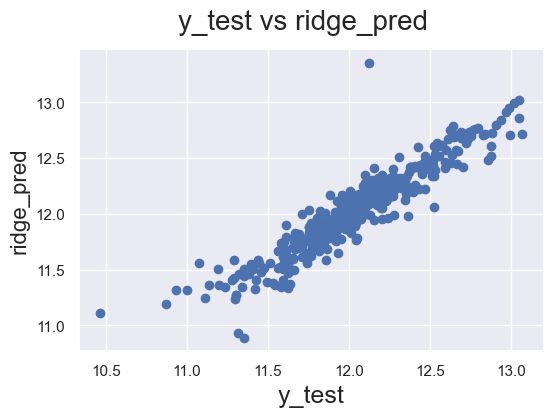

In [122]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

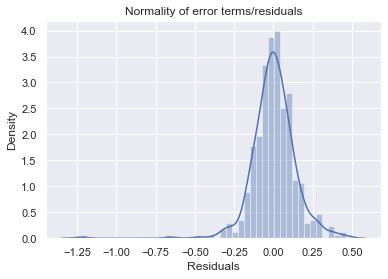

In [128]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


In [130]:
lasso_pred = lasso.predict(X_test)


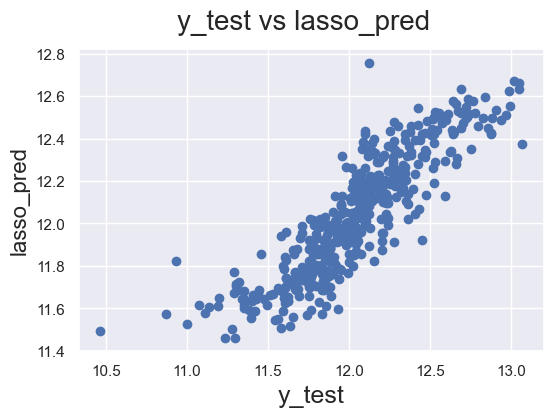

In [131]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

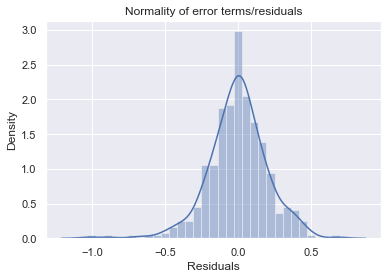

In [132]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [133]:
betas = pd.DataFrame(index=X_train.columns)


In [135]:
betas.rows = X_train.columns


In [136]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [137]:
pd.set_option('display.max_rows', None)
betas.head(68)


,Ridge,Lasso
MSSubClass,-0.049386,-0.000000
LotFrontage,-0.024418,0.000000
LotArea,0.163520,0.000000
OverallQual,0.440995,0.619861
OverallCond,0.300762,0.000000
MasVnrArea,0.015759,0.000000
BsmtFinSF1,-0.030147,0.000000
BsmtFinSF2,0.031853,0.000000
TotalBsmtSF,0.101007,0.000000
1stFlrSF,0.330038,0.000000


The company wants to know:
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


